In [1]:
# import library
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans



In [2]:
import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [3]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [4]:
# run plotly examples
pyoff.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# load data
df_data = pd.read_csv('Churn_Modelling.csv')

In [7]:
# first 10 data
df_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
# show data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# binary churn or not
df_data.loc[df_data.Exited=='No','Churn'] = 0 
df_data.loc[df_data.Exited=='Yes','Churn'] = 1

/usr/local/lib/python2.7/dist-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [10]:
# gender churn mean
df_data.groupby('Gender').Exited.mean()

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [11]:
# visualize gender churn rate
df_plot = df_data.groupby('Gender').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Gender'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [12]:
# visualize CreditScore churn rate
df_plot = df_data.groupby('CreditScore').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['CreditScore'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='CreditScore',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [13]:
# # visualize Geography churn rate
df_plot = df_data.groupby('Geography').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Geography'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Geography',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [14]:
# visualize Age churn rate
df_plot = df_data.groupby('Age').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Age'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Age',
        yaxis={"title": "Churn Rate"},
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [15]:
# visualize Balance churn rate
df_plot = df_data.groupby('Balance').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Balance'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Balance',
        yaxis={"title": "Churn Rate"},
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [16]:
# visualize NumOfProducts churn rate
df_plot = df_data.groupby('NumOfProducts').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['NumOfProducts'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='NumOfProducts',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [17]:
# HasCrCard churn mean
df_data.groupby('HasCrCard').Exited.mean()

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

In [18]:
# visualize HasCrCard churn rate
df_plot = df_data.groupby('HasCrCard').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['HasCrCard'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='HasCrCard',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [19]:
# IsActiveMember churn mean
df_data.groupby('IsActiveMember').Exited.mean()

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

In [20]:
# visualize IsActiveMember churn rate
df_plot = df_data.groupby('IsActiveMember').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['IsActiveMember'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='IsActiveMember',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [21]:
# EstimatedSalary churn rate
df_plot = df_data.groupby('EstimatedSalary').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['EstimatedSalary'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='EstimatedSalary',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [22]:
# tenure statistic
df_data.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [23]:
# visualize tenure churn rate
df_plot = df_data.groupby('Tenure').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['Tenure'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [24]:
# plot k-means clustering results
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



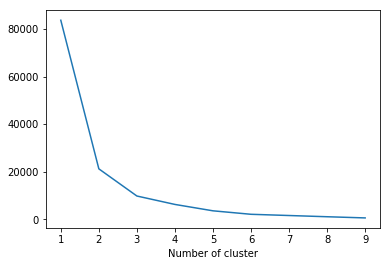

In [25]:
# evaluate k-means in elbow method
sse={}
df_cluster = df_data[['Tenure']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [26]:
# fit input data k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_data[['Tenure']])
df_data['TenureCluster'] = kmeans.predict(df_data[['Tenure']])

In [27]:
# get cluster label
df_data = order_cluster('TenureCluster', 'Tenure',df_data,True)

In [28]:
# tenure cluster statistic
df_data.groupby('TenureCluster').Tenure.describe()

,count,mean,std,min,25%,50%,75%,max
TenureCluster,,,,,,,,
0,3505.0,1.756919,0.997842,0.0,1.0,2.0,3.0,3.0
1,2968.0,4.992588,0.811909,4.0,4.0,5.0,6.0,6.0
2,3527.0,8.265381,1.027639,7.0,7.0,8.0,9.0,10.0


In [29]:
# change the name
df_data['TenureCluster'] = df_data["TenureCluster"].replace({0:'Low',1:'Mid',2:'High'})

In [30]:
# visualize churn Rate vs new clusters
df_plot = df_data.groupby('TenureCluster').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['TenureCluster'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='Tenure Cluster vs Churn Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [31]:
# show data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Churn              0 non-null float64
TenureCluster      10000 non-null object
dtypes: float64(3), int64(9), object(4)
memory usage: 1.3+ MB


In [32]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'CustomerId':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns) 

In [33]:
# show first 5 data
df_data[['Gender','IsActiveMember','TenureCluster_High','TenureCluster_Low','TenureCluster_Mid']].head()

,Gender,IsActiveMember,TenureCluster_High,TenureCluster_Low,TenureCluster_Mid
0,0,1,0,1,0
1,0,1,0,1,0
2,0,0,0,1,0
3,0,1,0,1,0
4,1,1,0,1,0


In [34]:
# replace some character
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [35]:
# combine column name
glm_columns = 'Gender'

for column in df_data.columns:
    if column not in ['Exited','CustomerId','Gender']:
        glm_columns = glm_columns + ' + ' + column

In [36]:
# create feature set and labels
X = df_data.drop(['Exited','CustomerId'],axis=1)
y = df_data.Exited

In [37]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [38]:
# build the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.88
Accuracy of XGB classifier on test set: 0.85


In [39]:
# predict model in xgboost
y_pred = xgb_model.predict(X_test)

In [40]:
# show prediction
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       392
           1       0.72      0.47      0.57       108

   micro avg       0.85      0.85      0.85       500
   macro avg       0.79      0.71      0.74       500
weighted avg       0.83      0.85      0.83       500



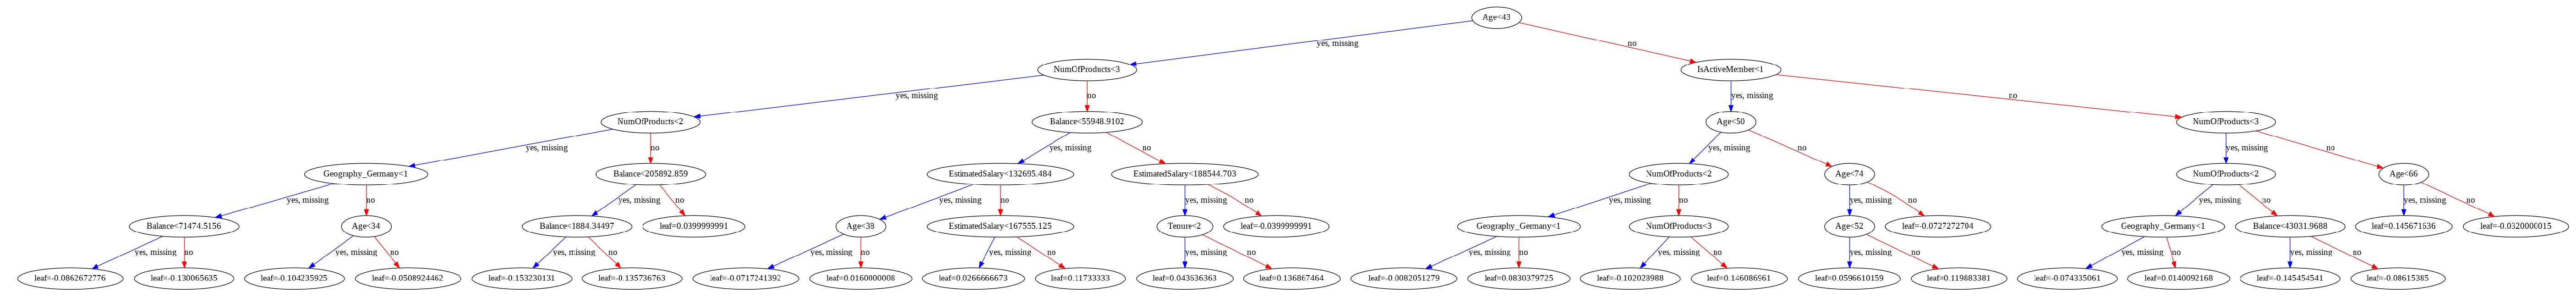

In [41]:
# use xgboost model
from xgboost import plot_tree

# set up the parameters
fig, ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model, ax=ax)

In [42]:
1/(1+np.exp(-0.032))


0.5079993174032311

In [43]:
from xgboost import plot_importance

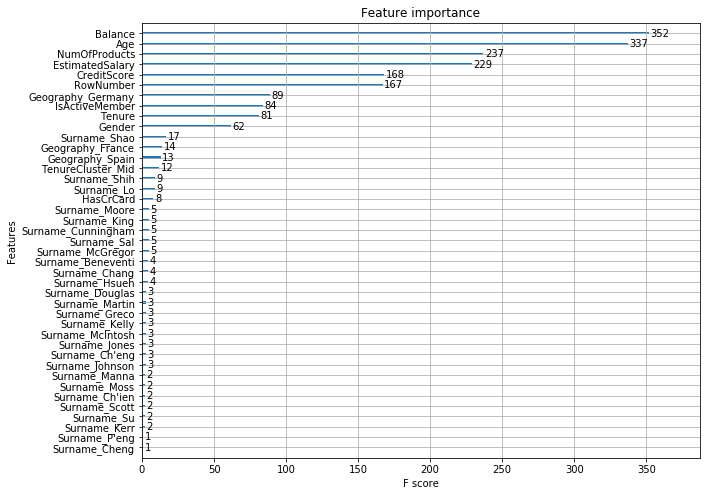

In [44]:
# returns tuple containing figure and axes object
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [45]:
# show only probability of 1
df_data['proba'] = xgb_model.predict_proba(df_data[X_train.columns])[:,1]

In [46]:
# show first 5 probability
df_data[['CustomerId', 'proba']].head()

,CustomerId,proba
0,15634602,0.288279
1,15647311,0.114844
2,15701354,0.067956
3,15737888,0.130248
4,15592389,0.038134


In [47]:
# Import pickle Package

import pickle

In [48]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_model, file)

In [49]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [50]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

Test score: 84.60 %


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [71]:
# mount ggole drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# run flask

from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction = np.array2string(model.predict(data))

    return jsonify(prediction)

if __name__ == '__main__':
    model = p.load(open(Pkl_Filename, 'rb'))
    app.run(debug=True, host='0.0.0.0')

In [ ]:
# request predictions

import requests
import json

url = 'http://0.0.0.0:5000/api/'

data = [[14.34, 1.68, 2.7, 25.0, 98.0, 2.8, 1.31, 0.53, 2.7, 13.0, 0.57, 1.96, 660.0]]
j_data = json.dumps(data)
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
r = requests.post(url, data=j_data, headers=headers)
print(r, r.text)